In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import scipy.stats as st
import functions as f

%matplotlib inline

# Time Spent on Each Step Analysis

In [2]:
#Importing data
df_web_data = pd.read_csv("../data/raw/df_join_clean.csv")
df_web_data = df_web_data.sort_values(by=["client_id","date_time"], ascending=[True,True])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,bal_category_3,bal_category_2,Variation
70439,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test
70438,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test
70437,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test
70436,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test
70435,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274611,9999729,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:40,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test
274610,9999729,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:09:19,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test
274609,9999729,834634258_21862004160,870243567_56915814033_814203,4,2017-05-08 16:09:40,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test
243643,9999832,145538019_54444341400,472154369_16714624241_585315,0,2017-05-16 16:46:03,23,281,49,F,2,431887.61,1,4,Adults,High,High,Test


In [3]:
#Creation and cleaning of columns for time difference and time spent

df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

#df_web_data["prev_step"] = df_web_data.groupby("visit_id")["process_step"].shift(1)
#is_repeated = df_web_data["process_step"] == df_web_data["prev_step"]

#df_web_data = df_web_data[~((df_web_data["process_step"] == 0) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")
#df_web_data = df_web_data[~((df_web_data["process_step"] == 4) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")

#df_web_data = df_web_data.drop(columns=["prev_step"])

df_web_data["time_diff"] = df_web_data.groupby("visit_id")["date_time"].diff()
df_web_data["time_spent"] = df_web_data["time_diff"].shift(-1)

In [4]:
df_time= df_web_data.dropna(subset=["Variation"], inplace = True)
df_time= df_web_data.dropna(subset=["time_spent"], inplace = True)
df_time = df_web_data[df_web_data["process_step"] != 4]
df_time["time_spent"] = df_time["time_spent"].dt.total_seconds().astype(float)

df_time

/var/folders/t7/r8w3_tr56x11jqj9zdjr7m4w0000gn/T/ipykernel_53842/3658663622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time["time_spent"] = df_time["time_spent"].dt.total_seconds().astype(float)


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,bal_category_3,bal_category_2,Variation,time_diff,time_spent
70439,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test,NaT,7.0
70438,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test,0 days 00:00:07,32.0
70437,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test,0 days 00:00:32,99.0
70436,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,3,46,30,U,2,25454.66,2,6,Young Adult,Low,Low,Test,0 days 00:01:39,20.0
135193,647,66758770_53988066587,40369564_40101682850_311847,0,2017-04-12 15:41:28,12,151,58,M,2,30525.80,0,4,Senior,Low,Low,Test,NaT,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274613,9999729,834634258_21862004160,870243567_56915814033_814203,0,2017-05-08 16:08:25,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test,NaT,5.0
274612,9999729,834634258_21862004160,870243567_56915814033_814203,1,2017-05-08 16:08:30,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test,0 days 00:00:05,10.0
274611,9999729,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:40,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test,0 days 00:00:10,39.0
274610,9999729,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:09:19,10,124,31,F,3,107059.74,6,9,Adults,High,High,Test,0 days 00:00:39,21.0


## General Average Time Spent per Step

In [5]:
average_time_per_step = df_time.groupby("process_step")["time_spent"].mean()

df_results = pd.DataFrame({
    "average_time": average_time_per_step})

df_results

,average_time
process_step,
0,50.836975
1,55.356711
2,103.729051
3,150.109743


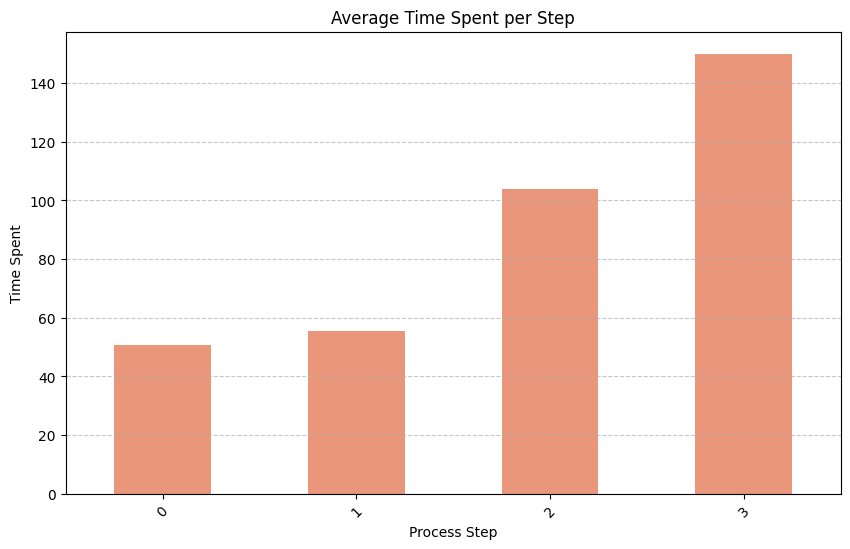

In [6]:
df_results["average_time"].plot(kind="bar", figsize=(10, 6), rot=45, color='darksalmon')
plt.title("Average Time Spent per Step")
plt.xlabel("Process Step")
plt.ylabel("Time Spent")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Average Time Spent per Step by Group

In [7]:
grouped_stats = df_time.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds = grouped_stats.pivot(index="process_step", columns="Variation", values="time_spent")

crosstab_seconds

Variation,Control,Test
process_step,,
0,53.780241,48.193108
1,56.004072,54.840318
2,104.134702,103.402375
3,148.301899,151.531596


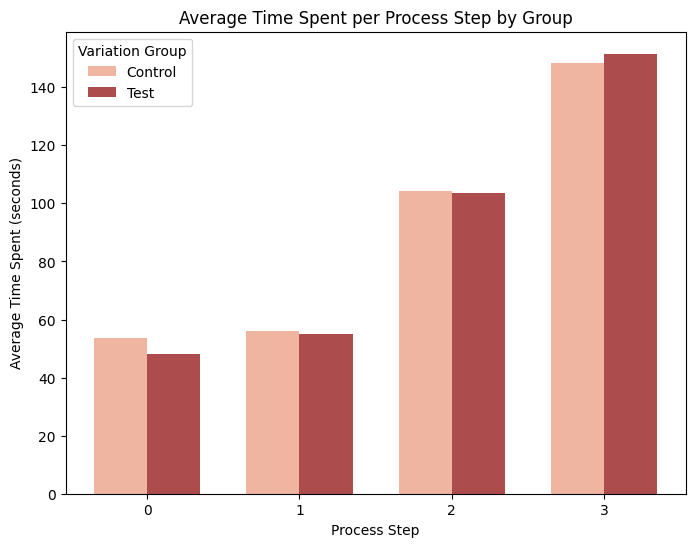

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds.index  

ax.bar(x - bar_width / 2, crosstab_seconds["Control"], bar_width, label="Control", alpha=0.7, color='darksalmon')
ax.bar(x + bar_width / 2, crosstab_seconds["Test"], bar_width, label="Test", alpha=0.7, color='darkred')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")

plt.show()

## Age exploration

In [9]:
df_grouping = df_time[df_time["age_group"] == "Young Adult"]
grouped_stats = df_grouping.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds = grouped_stats.pivot(index="process_step", columns="Variation", values="time_spent")

crosstab_seconds

Variation,Control,Test
process_step,,
0,39.419860,37.588135
1,38.506048,43.227219
2,91.698185,94.958527
3,100.661701,115.096829


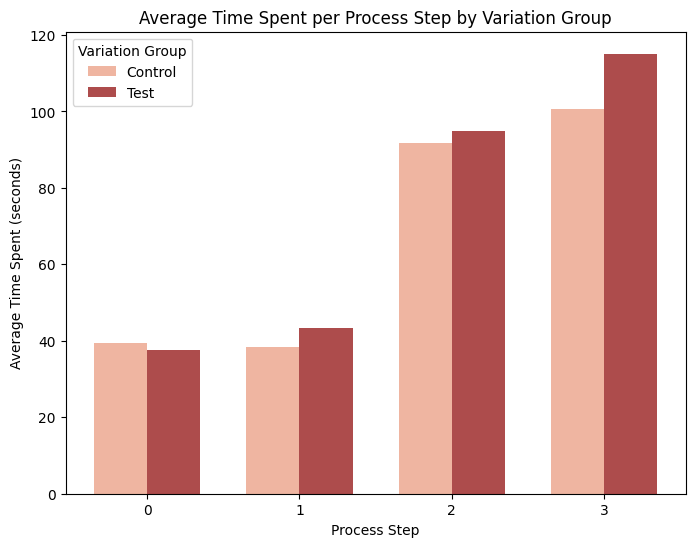

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds.index  

ax.bar(x - bar_width / 2, crosstab_seconds["Control"], bar_width, label="Control", alpha=0.7, color='darksalmon')
ax.bar(x + bar_width / 2, crosstab_seconds["Test"], bar_width, label="Test", alpha=0.7, color='darkred')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Variation Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")
plt.show()

# Hypothesis Testing

## One way (ANOVA)

In [11]:
#Control Group ANOVA

df_control_0 = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_1 = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_2 = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_3 = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Control")]["time_spent"]

#H0: mu df_control_0 = mu df_control_1 = mu df_control_2 = df_control_3
#H1: mu df_control_0 != mu df_control_1 != mu df_control_2 != df_control_3

alpha = 0.05

anova_results_control = st.f_oneway(df_control_0, df_control_1, df_control_2, df_control_3)

print(f"F-Statistic: {anova_results_control.statistic:.5f}")  
print(f"P-Value: {anova_results_control.pvalue:.5f}")  

#As p-value < 0,05 we can reject Ho

F-Statistic: 929.34294
P-Value: 0.00000


In [12]:
#Test Group ANOVA

df_test_0 = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_1 = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_2 = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_3 = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Test")]["time_spent"]

#H0: mu df_test_0 = mu df_test_1 = mu df_test_2 = df_test_3
#H1: mu df_test_0 != mu df_test_1 != mu df_test_2 != df_test_3

#alpha = 0.05

anova_results_test = st.f_oneway(df_test_0, df_test_1, df_test_2, df_test_3)

print(f"F-Statistic: {anova_results_test.statistic:.5f}")  
print(f"P-Value: {anova_results_test.pvalue:.5f}")  

#As p-value < 0,05 we can reject Ho

F-Statistic: 849.21815
P-Value: 0.00000


## Two_sample t-test

In [17]:
# Step 0 two_sample test (control vs test groups)

df_control_0_two = df_time[(df_time["process_step"] == 0 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_0_two = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_0_two = mu df_test_0_two
#H1: mu df_control_0_two != mu df_test_0_two

#alpha = 0,05

two_sided_0 = st.ttest_ind(df_control_0_two, df_test_0_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_0.statistic:.5f}")  
print(f"P-Value: {two_sided_0.pvalue:.5f}") 

#As p-value < 0,05 we can reject Ho

F-Statistic: 3.94179
P-Value: 0.00008


In [18]:
# Step 1 two_sample test (control vs test groups)

df_control_1_two = df_time[(df_time["process_step"] == 1 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_1_two = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_1_two = mu df_test_1_two
#H1: mu df_control_1_two != mu df_test_1_two

#alpha = 0,05

two_sided_1 = st.ttest_ind(df_control_1_two, df_test_1_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_1.statistic:.5f}")  
print(f"P-Value: {two_sided_1.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 0.74550
P-Value: 0.45597


In [20]:
# Step 2 two_sample test (control vs test groups)

df_control_2_two = df_time[(df_time["process_step"] == 2 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_2_two = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_2_two = mu df_test_2_two
#H1: mu df_control_2_two != mu df_test_2_two

#alpha = 0,05

two_sided_2 = st.ttest_ind(df_control_2_two, df_test_2_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_2.statistic:.5f}")  
print(f"P-Value: {two_sided_2.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 0.31913
P-Value: 0.74963


In [21]:
# Step 3 two_sample test (control vs test groups)

df_control_3_two = df_time[(df_time["process_step"] == 3 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_3_two = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_3_two = mu df_test_3_two
#H1: mu df_control_3_two != mu df_test_3_two

#alpha = 0,05

two_sided_3 = st.ttest_ind(df_control_3_two, df_test_3_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_3.statistic:.5f}")  
print(f"P-Value: {two_sided_3.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: -0.97344
P-Value: 0.33034
